# Magritte quick plots

#### An example notebook for making plots of the most recent Magritte output
---

## Loading Magritte output

Import the `MagritteIO` module for handling the `Magritte` input and output.

In [9]:
import MagritteIO as mio

Get the current (i.e. most recent) output directory and the number of outputs it contains.

In [10]:
outputDirectory = mio.outputDirectory()           # current output directory
nOutputs        = mio.nOutputs(outputDirectory)   # number of outputs

Read the `Magritte` output from the `outputDirectory` into the cell structure. Each output has its own cell structure. `cells` is the array of cell structures for all outputs.

In [11]:
tags  = range(nOutputs)
cells = [mio.cell(outputDirectory, str(tag)) for tag in tags]

## Plotting output

Import `matplotlib.pyplot` for plotting.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Plot gas temperature

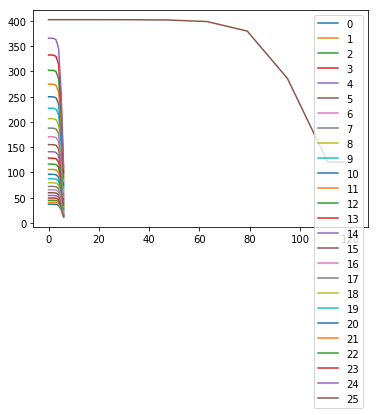

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs):
    ax1.plot(cells[i].temperatureGas, label=i)
ax1.legend()

Plot dust temperature

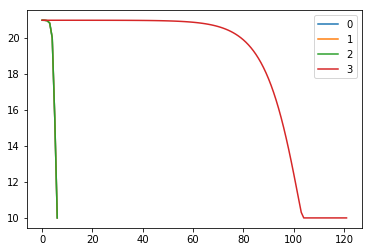

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs):
    ax1.plot(cells[i].temperatureDust, label=i)
ax1.legend()

In [7]:
np.shape(cells[0].abundances)

(7, 35)

/usr/lib/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


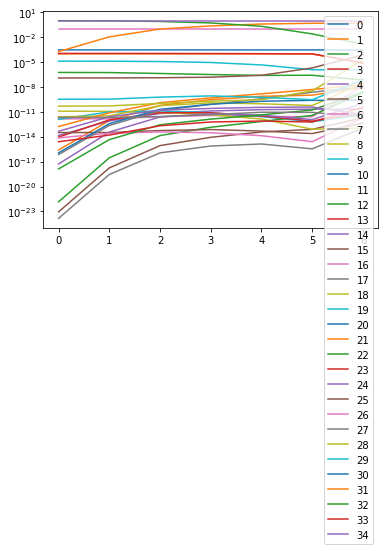

In [8]:
tag = 0

nspec = np.shape(cells[tag].abundances)[1]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for s in range(nspec):
    ax1.plot(cells[tag].abundances[:,s], label=s)
    ax1.set_yscale('log')
ax1.legend()

In [28]:
import numpy as np
A = np.loadtxt(outputDirectory+'Einstein_A.txt')
print A

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  4.21700000e-05   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   4.04800000e-04   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+

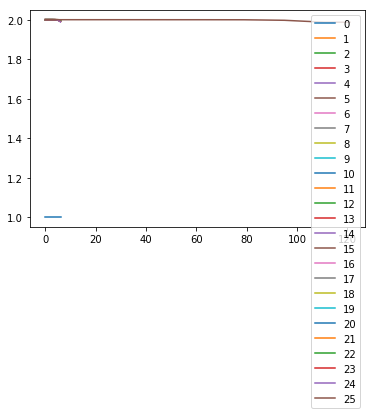

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs):
    ax1.plot(cells[i].thermalRatio, label=i)
ax1.legend()

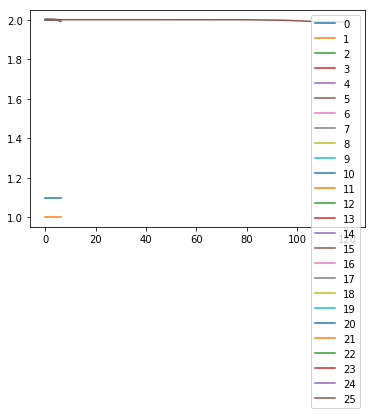

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs):
    ax1.plot(cells[i].thermalRatioPrev, label=i)
ax1.legend()

In [9]:
print cells[6].temperatureGas

[ 24.6247   24.11148  23.82378  23.32455  23.1024   22.65401  22.37393
  22.04973  21.73989  21.49878  21.25714  20.90761  20.68404  20.56021
  20.32494  20.12263  20.03104  19.99118  19.8879   19.66698  19.6622
  19.83406  20.01828  20.00553  20.21759  20.20076  20.4346   20.6215
  20.7813   20.94711  21.19885  21.46193  21.73457  22.03928  22.38243
  22.76314  23.19824  23.73272  24.39227  25.10488  25.83831  26.59317
  27.37009  28.1697   28.99266  29.83968  30.71143  31.60865  32.5321
  33.4825 ]


In [10]:
def newTemp(cell):
    return (cell.temperatureGas * cell.thermalRatioPrev - cell.temperatureGasPrev * cell.thermalRatio)

def newDen(cell):
    return (cell.thermalRatioPrev - cell.thermalRatio)

In [11]:
print newTemp(cells[5])

[ 16.97218  16.61844  16.42016  16.07608  15.92296  15.61392  15.42088
  15.19742  14.98386  14.81768  14.65114  14.41024  14.25614  14.1708
  14.00864  13.8692   13.80608  13.7786   13.70742  13.55516  13.55186
  13.6703   13.79728  13.7885   13.93464  13.92304  14.08422  14.21304
  14.32318  14.43746  14.61096  14.7923   14.9802   15.19022  15.42674
  15.68914  15.98902  16.3574   16.81198  17.30314  17.80864  18.32892
  18.8644   19.41552  19.98272  20.56652  21.16736  21.78576  22.42222
  23.07728]


In [12]:
print newDen(cells[5])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [13]:
print cells[5].thermalRatioPrev

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


In [14]:
print cells[5].thermalRatio

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
